In [1]:
import secrets
from collections import deque
import multiprocessing
from bitstring import BitArray
import progressbar
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import IPython.display as ipd
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import rescale, resize, downscale_local_mean
import cv2
from glob import glob
from sys import exit
# from time import time
import time
import shutil
import os
import scipy
from scipy import signal
from scipy import stats
# from scipy.misc import imsave
import datetime
import math
from pathlib import Path
import youtube_dl
import argparse
import sys
import mido
import json
import os.path
from os import path
import seaborn as sns
import copy
import PIL
from scipy import misc

import random

from madmom.audio.filters import LogarithmicFilterbank
from madmom.features.onsets import SpectralOnsetProcessor
from madmom.audio.signal import normalize

import parselmouth

from midiutil.MidiFile import MIDIFile
from pandas.core.frame import DataFrame

from multiprocessing import Pool
import multiprocessing as mp

from channel import Channel

sns.set() # Use seaborn's default style to make attractive graphs

In [14]:
sample_rate = 20442
pixel_interval=0.025
time_interval=pixel_interval*256
hop_length=512

def drawChroma_stft(y, sr):
# #     _test_ = librosa.feature.chroma_stft(y=y, sr=sr)
# #     librosa.display.specshow(_test_, sr=sample_rate, x_axis='ms',  y_axis='mel', linewidth=0.01)
#     _test_ = librosa.feature.spectral_centroid(y=y, sr=sr)
#     librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
#                          y_axis='log', x_axis='time')
#     plt.ylim([0, 8192])

    chromagram=librosa.feature.chroma_stft(y=y, sr=sample_rate, n_fft=512, hop_length=hop_length)
    librosa.display.specshow(chromagram, x_axis='ms', y_axis='chroma', sr=sample_rate, hop_length=hop_length, cmap='coolwarm', linewidth=0.01)
#     plt.ylim([0, 8192])
#     plt.xticks([])
#     plt.yticks([])    
def drawMFCC( y, sr):
        mfccs = librosa.feature.mfcc(y=y, sr=sample_rate, hop_length=hop_length, n_mfcc=40)
#         _mfccs = mfccs.astype('float64')
        _mfccs = np.array(mfccs).astype('float64')
        _mfccs = sklearn.preprocessing.scale(_mfccs, axis=1)
        print('MFCC',len(_mfccs[0]),_mfccs[0][0])
#         librosa.display.specshow(mfccs, sr=self.sample_rate, x_axis='time',y_axis='linear',  linewidth=0.01)  
#         librosa.display.specshow(mfccs, sr=fs, x_axis='ms',  y_axis='hz', linewidth=0.01)
        librosa.display.specshow(_mfccs, sr=sample_rate, x_axis='ms',  y_axis='mel', linewidth=0.01)
        plt.ylim([0, 8192])
#         plt.xticks([])
#         plt.yticks([])
        return mfccs
def drawChroma_cqt(y, sr):
    chromagram = librosa.feature.chroma_cqt(y=y, sr=sample_rate, hop_length=hop_length)
    librosa.display.specshow(chromagram, x_axis='ms', y_axis='mel', sr=sample_rate, hop_length=hop_length, cmap='coolwarm', linewidth=0.01)
def drawChroma_cens(y, sr):
    chromagram = librosa.feature.chroma_cens(y, sr=sample_rate, hop_length=hop_length)
    librosa.display.specshow(chromagram, x_axis='ms', y_axis='mel', sr=sample_rate, hop_length=hop_length, cmap='coolwarm', linewidth=0.01)
def drawTonnetz(y,sr):
    chromagram = librosa.feature.tonnetz(y=y, sr=sample_rate)
#     librosa.display.specshow(chromagram, x_axis='ms', y_axis='chroma', sr=sample_rate, hop_length=hop_length, cmap='coolwarm', linewidth=0.01)
    librosa.display.specshow(chromagram, x_axis='ms', sr=sample_rate, hop_length=hop_length, cmap='coolwarm', linewidth=0.01)
def run_Creating_Datasets_ALLINONE(song_path, offset=0.0, duration=None, prefix_name=None):         
    start_time = datetime.datetime.now()
    dirname = os.path.dirname(song_path)
    basename = os.path.basename(song_path)
    songname = os.path.splitext(basename)[0]
    if prefix_name is None:
        save_path = '%s/%s_feature_full.png'%(dirname,songname)
    else:
        save_path = '%s/%s_%s_feature_full.png'%(dirname,songname,prefix_name)
    ax_total = 5
    ax_num = 1
    w = 256
    h = 256
    
    y, sr = librosa.load(song_path,sr=sample_rate, offset=offset, duration=duration)
    print(len(y))
    print(sr)
#     snd = parselmouth.Sound(song_path)
    total_sec = librosa.get_duration(y=y, sr=sample_rate)
    w_ratio = int(math.ceil(total_sec / time_interval))
    w = w * w_ratio
#         print('=== width : {} , total_sec: {}, wanted_sec: {}==='.format(w, total_sec, w_ratio*self.time_interval))
    num_pad = round(w_ratio * time_interval * sample_rate - y.shape[0])
    y = np.pad(y, (0, num_pad), 'constant', constant_values=(0, 0))            
    plt.style.use('dark_background')
#     fig = plt.figure(0)
    fig = plt.figure(figsize=(20,20))
    
    
        
    ############
    #### AX ####
    ############
    # 原波形圖
    ax1 = plt.subplot(ax_total,1,ax_num)
#     ax1.axis('off')
    ax_num += 1            

    # AX1
    drawMFCC(y=y, sr=sample_rate)
     
            
    # AX2
#     plt.xticks([])
#     plt.yticks([])
    ax2 = plt.subplot(ax_total,1,ax_num, sharex=ax1)
#     ax2.axis('off')
    ax_num += 1
    drawChroma_cens(y=y, sr=sample_rate)
    
    
#             self.drawChroma_stft(y=y, sr=self.sample_rate, N=2048, H=1024)
#             self.drawChroma_cqt(y=y, sr=self.sample_rate)
    
    # AX3
#     plt.xticks([])
#     plt.yticks([])
    ax3 = plt.subplot(ax_total,1,ax_num, sharex=ax1)
#     ax3.axis('off')
    ax_num += 1
    drawChroma_cqt(y=y, sr=sample_rate)
    
    # AX4
#     plt.xticks([])
#     plt.yticks([])
    ax4 = plt.subplot(ax_total,1,ax_num, sharex=ax1)
#     ax4.axis('off')
    ax_num += 1
    drawChroma_stft(y=y, sr=sample_rate)
    
    # AX5
#     plt.xticks([])
#     plt.yticks([])
    ax5 = plt.subplot(ax_total,1,ax_num, sharex=ax1)
#     ax5.axis('off')
    ax_num += 1
    drawTonnetz(y=y, sr=sample_rate)
    
#     ############
#     #### AX ####
#     ############
#     plt.xticks([])
#     plt.yticks([])
#     ax5 = plt.subplot(ax_total,1,ax_num)
#     ax5.axis('off')
#     ax_num += 1
#     draw_chroma_stft(y=y, sr=sample_rate)

            
    ##################################################################################
#     fig.set_size_inches((w/100.0)/3,(h/100.0)/3) #dpi = 300, output = 256*256 pixels
#     plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
#     plt.margins(0,0)

    plt.tight_layout()
    plt.show()
    corp_song_name_path = '%s_crop_song.png'%(songname)  
    fig.savefig(corp_song_name_path, format='png', transparent=True, dpi=300, pad_inches = 0)
    inputs = cv2.imread(corp_song_name_path)
    data = inputs        
        
    try:
        os.remove(save_path)
    except OSError as e:
        # print(e)
        pass
    else: 
        pass
            
    try:
        os.remove(corp_song_name_path)
    except OSError as e:
        # print(e)
        pass
    else: 
        pass
                        
    cv2.imwrite(save_path, data)
    plt.close(fig)
    elapsed_time = datetime.datetime.now() - start_time


    print('########################## song_path:%s #############################' % (song_path))
    print(' width: {} , total_sec: {}, wanted_sec: {}'.format(w, total_sec, w_ratio*time_interval))
    print(' elapsed_time: %s '%(elapsed_time))
    

4116510
20442
MFCC 8177 -3.9263664182493137


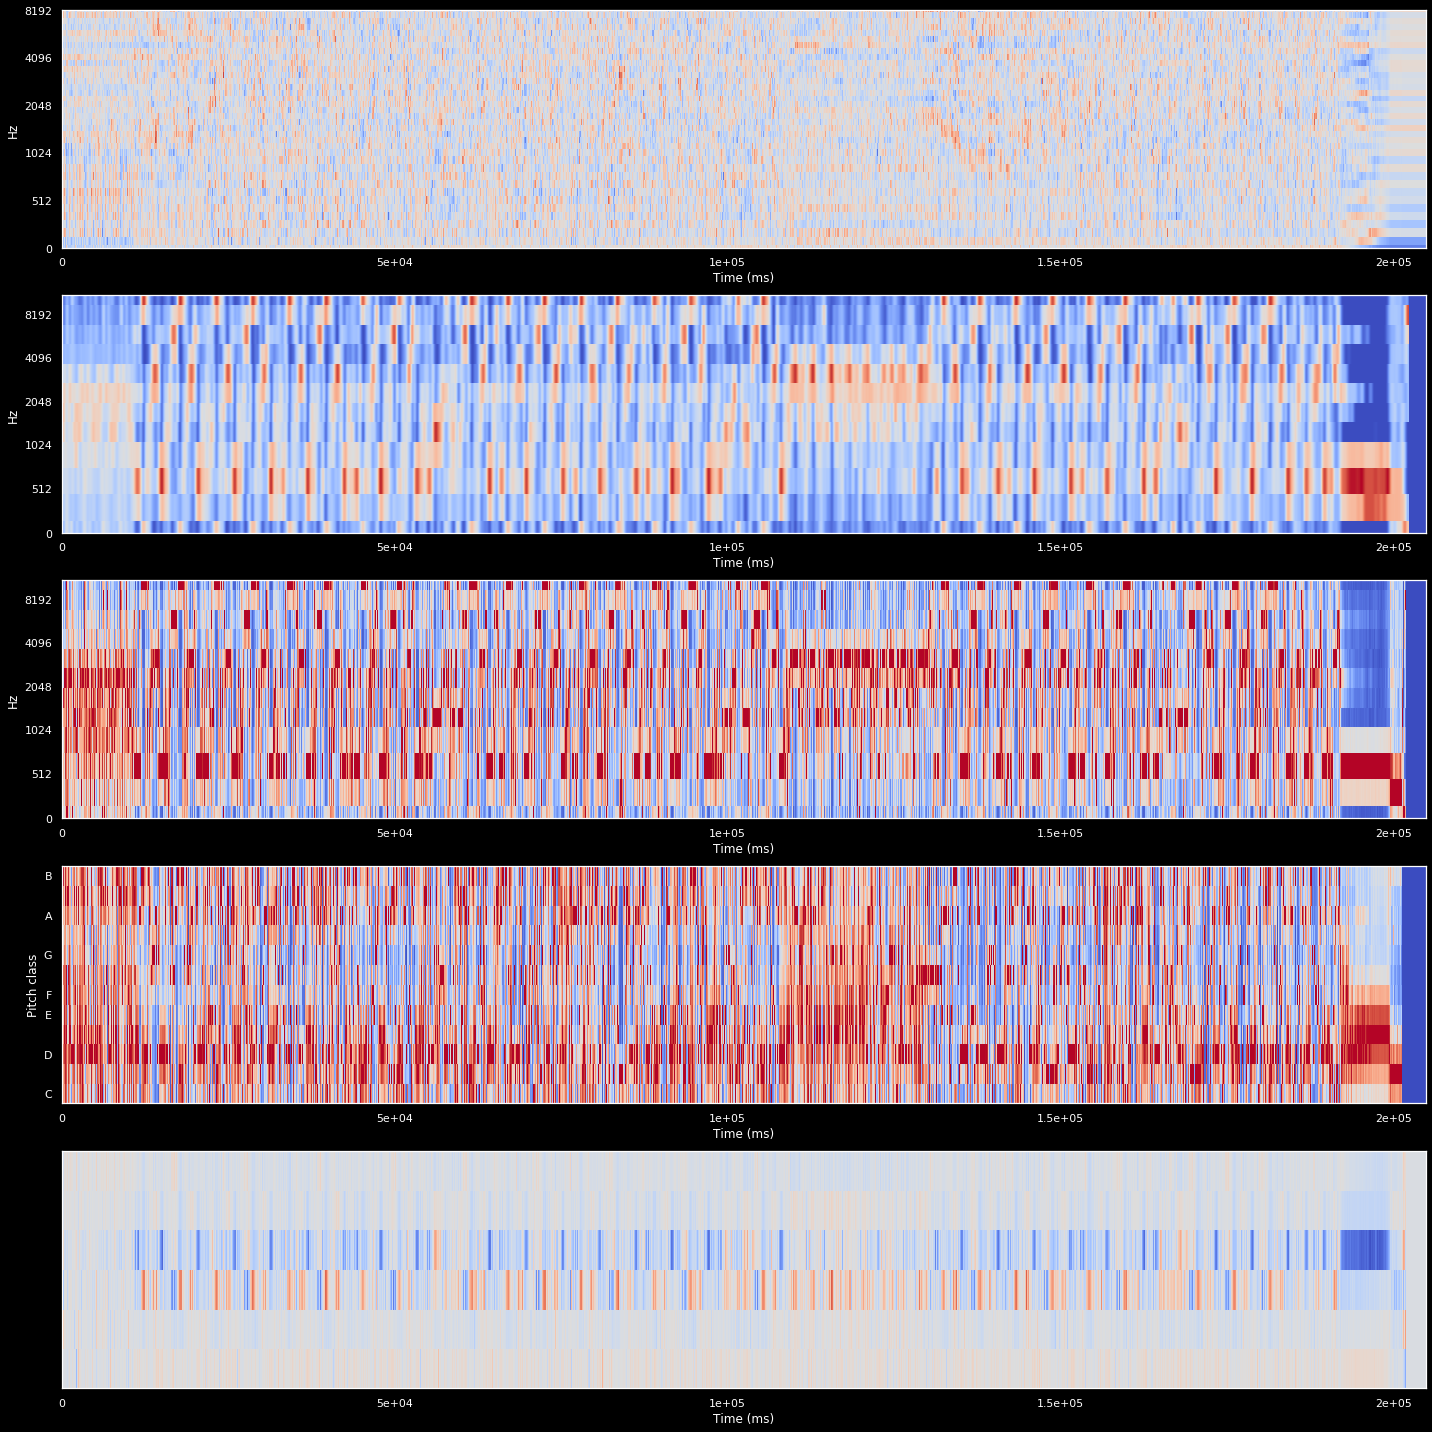

########################## song_path:./1/1.mp3 #############################
 width: 8192 , total_sec: 201.37511006750807, wanted_sec: 204.8
 elapsed_time: 0:00:23.160934 


In [15]:
run_Creating_Datasets_ALLINONE(song_path='./1/1.mp3')